In [1]:
import numpy as np
from scipy.linalg import toeplitz
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
n = 4
n_e = 2*n-1
e = np.arange(1,n_e**2+1)
#e

In [13]:
t = []
for _e_ in np.split(e,2*n-1):
    t += [toeplitz(_e_[n-1::-1],_e_[n-1:])]

q = toeplitz(range(n-1,-1,-1),range(n-1,2*n-1))

c = []
for i in range(n):
    r = []
    for j in range(n):
        r += [t[q[i][j]]]
    c += [np.hstack(r)]
f = np.vstack(c)

#f

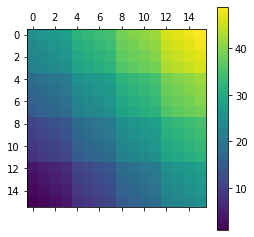

In [14]:
plt.matshow(f)
plt.colorbar()

In [15]:
t = ceo.Gbtbt(1,1,n,n,e.astype(np.float32))

In [16]:
u = np.ones((n**2,1),dtype=np.float32)

In [17]:
y0 = f@u

In [18]:
y = t.MVM(u.ravel())

In [19]:
np.sqrt(np.sum((y.host()-y0)**2))/y.size

1.1444091796875e-05

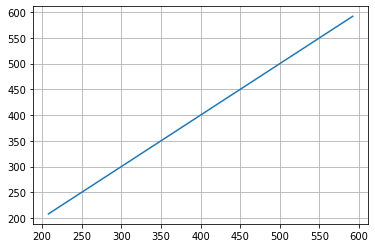

In [20]:
plt.plot(y0,y.host_data)
plt.grid()